# Question 7

In an epidemic, there are at any particular time $x$ people not yet infected and $y$ people who are ill. The rate at which people become ill is $\alpha x$, where $\alpha$ is a constant. If $x$ is initially equal to $N$, find an expression for $x$ at time $t$. Regard the numbers of people $x$ and $y$ as continuous variables. 

The rates of recovery and death of those who are ill are $\beta y$ and $\gamma y$, respectively. If $y$ is initially equal to zero, find an expression for the number of deaths up to time $t$ from the start of the epidemic. Assume that those who recover are immune from further infection. 

The expression for the number of deaths appears to be indeterminate if $\alpha = \beta + \gamma$. Find the limiting form of the expression as $\beta + \gamma \rightarrow \alpha$.

Not all differential equations can be solved algebraically; sometimes numerical integration is the only option. Use Python to solve the system of equations numerically, and compare the numerical and exact solutions graphically.

__Python hints__ 
- Start by choosing values for $\alpha$, $\beta$, $\gamma$, an arbitrary total number of people.  
- Use forward Euler integration to find the solutions numerically. The forward Euler method estimates the 
  next value by approximating the solution to be a straight line from the previous point, with gradient equal 
  to the derivative at the original point.  
- The forward Euler integration method is a first-order method, which means that the local error (error per step) 
  is proportional to the square of the step size, and the global error (error at a given time) is proportional to the   step size. If you wish for an extension, try plotting several step size values on the same plot, or plot the average   error against the step size to see this relationship.

## Solution

First we import the `numpy` and `matplotlib.pyplot` modules. We also use the magic command for inline plotting in Jupyter notebooks.

In [1]:
# Import NumPy
import numpy as np

# Import from Matploylib and set magic command for plotting inside a Jupyter notebook
import matplotlib.pyplot as plt
%matplotlib inline

We declare the $\alpha$, $\beta$, $\gamma$ and $N$ parameters (experiment with different values):

In [2]:
# Rate of infection (Try numbers close to β + γ as well)
α = 0.5

# Rate of recovery
β = 0.5

# Rate of death
γ = 0.5

# Total population
N = 1000

We declare the initial conditions (supplied by the question):

In [3]:
# Number of healthy people intially
x0 = N

# Number of people who are ill initially
y0 = 0

# Number of dead people initially
z0 = 0

We set the time parameters - the total time to run over, and the number of t and the step size:

In [4]:
# Create 50 time intervals from 0 to 10
T = np.linspace(0, 10, num=50)

We initialise arrays for the number of healthy, ill and dead people at each time step:

In [5]:
# Initialise arrays filled with zeros
X = np.zeros(len(T))
Y = np.zeros(len(T))
Z = np.zeros(len(T))

The forward Euler method uses 

$$
x_{i} = x_{i-1} + \left.\frac{dx}{dt}\right|_{i-1} \Delta t
$$

to advance $x$ from time $t$to $t + \Delta t$. Applying this to the $x$, $y$ and $z$:

\begin{align}
x_{i} &= x_{i-1} - \alpha x_{i-1} \Delta t \\
y_{i} &= y_{i-1} + \alpha x_{i-1} \Delta t - \beta y_{i-1} \Delta t - \gamma y_{i-1} \Delta t \\
z_{i} &= z_{i-1} + \gamma y_{i-1} \Delta t
\end{align}

We use this to compute $x$, $y$ and $z$ and each time step, and store the results in the arrays `X`, `Y` and `Z`.

In [6]:
# Set initial conditions
X[0] = x0
Y[0] = y0
Z[0] = z0

# Step through time
for i in range(1, len(T)):

    # Compute time increment
    dt = T[i] - T[i-1]
    
    # Calculate the next values of x, y, z from the current value and the derivarive
    X[i] = X[i-1] - α*X[i-1]*dt
    Y[i] = Y[i-1] + α*X[i-1]*dt - β*Y[i-1]*dt - γ*Y[i-1]*dt
    Z[i] = Z[i-1] + γ*Y[i-1]*dt

We calculate the exact solution, for comparison. We then fill the arrays with the exact values at each time value, from our equations as calculated in the question:   

\begin{align}
x &= Ne^{-\alpha t}
\\ 
y &= \frac{\alpha N}{\beta + \gamma - \alpha} \left(e^{-\alpha t} - e^{-(\beta + \gamma)t}\right)
\\
z &= \frac{\alpha \gamma N}{\beta + \gamma - \alpha}  \left( \frac{1-e^{-\alpha t}}{\alpha} - \frac{1- e^{-(\beta +\gamma )t}}{\beta +\gamma} \right)
\end{align}

In [7]:
# Create an array of time values at which we calculate the exact solutions
T_exact = np.linspace(0, T[-1], 100)

# Calculate the analytical values
X_exact = (N*np.exp(-α*T_exact))
Y_exact = ((α*N)/(β + γ - α)*(np.exp(-α*T_exact) - np.exp(-(β + γ)*T_exact)))
Z_exact = ((α*γ*N)/(β + γ - α)*((1 - np.exp(-α*T_exact))/α - (1 - np.exp(-(β + γ)*T_exact))/(β + γ)))

We finally plot the numerical and exaction solutions:

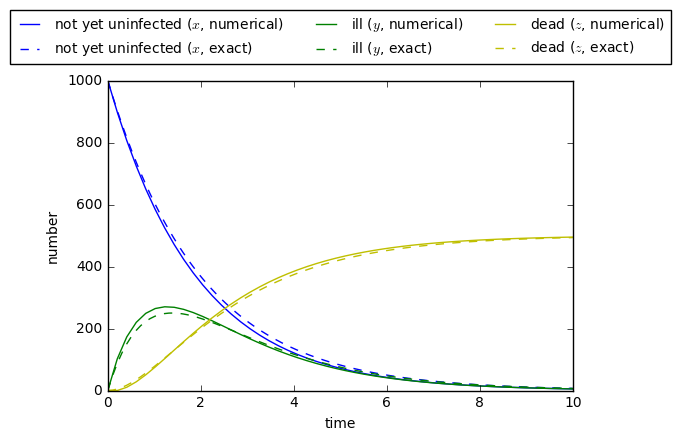

In [8]:
# Plot number of no yet infected people (numerical and analytical)
plt.plot(T, X, '-', color='b', label='not yet uninfected ($x$, numerical)')
plt.plot(T_exact, X_exact, '--', color='b', label='not yet uninfected ($x$, exact)')

# Plot number of ill people (numerical and analytical)
plt.plot(T, Y, '-',  color='g', label='ill ($y$, numerical)')
plt.plot(T_exact, Y_exact, '--',  color='g', label='ill ($y$, exact)')

# Plot number of dead (numerical and analytical)
plt.plot(T, Z, '-',  color='y', label='dead ($z$, numerical)')
plt.plot(T_exact, Z_exact, '--',  color='y', label='dead ($z$, exact)')

# Add axis labels
plt.xlabel('time')
plt.ylabel('number')

# Add legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fontsize=10);